# Importer les packages nécessaires 

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importer la base de données Iris

In [2]:
# Importation du data
data = pd.read_csv('xclara.csv')
# Affichage de la taille du data
print(data.shape)
# Affichage de l'entête du data 
data.head()

(3000, 3)


,Unnamed: 0,V1,V2
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729


# Extraire les valeurs du data et les tracer

[[  2.072345  -3.241693]
 [ 17.93671   15.78481 ]
 [  1.083576   7.319176]
 ...
 [ 64.46532  -10.50136 ]
 [ 90.72282  -12.25584 ]
 [ 64.87976  -24.87731 ]]


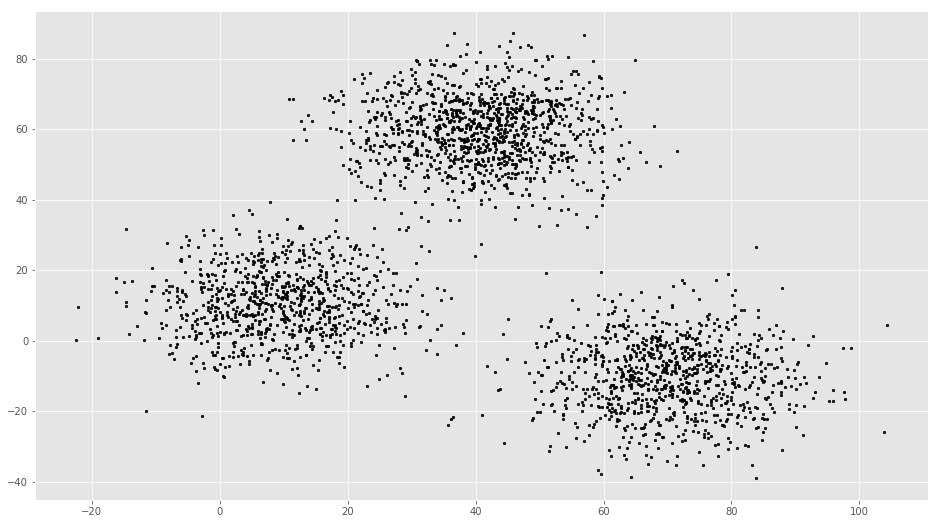

In [3]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
print(X)
plt.scatter(f1, f2, c='black', s=7)

# Fonction pour calculer la distance euclidean

In [4]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Initialisation des variables

In [5]:
# Nombre de classes
k = 2
# Taille du matrice qui contient les valeurs du data
c = X.shape[1]
n = X.shape[0]
# Variable pour dire si le nombre de classes est fixé ou non
fixed_no_of_clusters= False    

# Fonction pour générer aléatoirement les k centres initiaux

In [6]:
def generation_centre_clusters(k):
    C = np.random.randn(k,c)
    for i in range(k):
        C[i]=X[np.random.randint(0,n-1)]
    return(C)
C=generation_centre_clusters(k)

# Tracer les centres initiaux

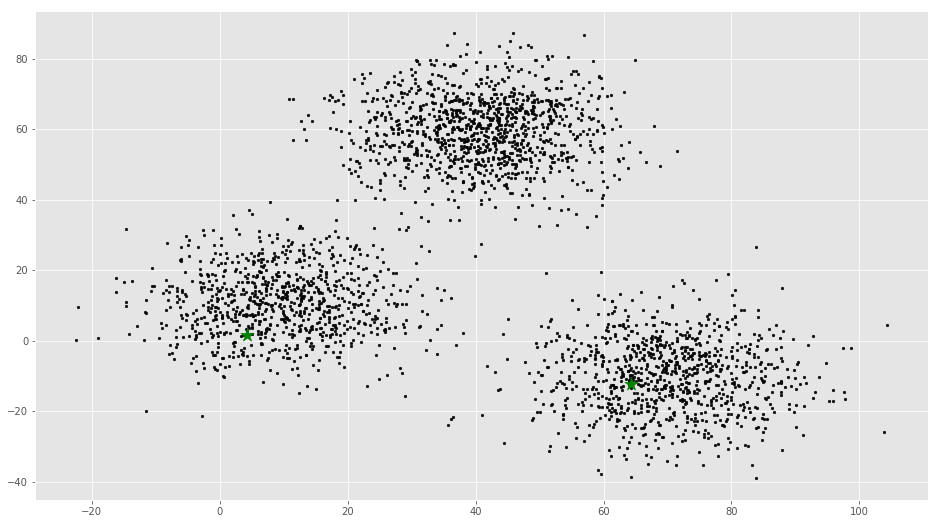

In [7]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='g')

plt.grid(True)
plt.show()

# Appliquation du kmeans

In [8]:
def initialisation_old_new_centers():
    # Pour stocker les valeurs des centres qu'on ils sont modifiés
    C_old = np.zeros(C.shape)
    return(C_old)
# Labels des classes(0, 1, 2)
clusters = np.zeros(len(X))
# Fonction d'erreur - La distance entre les nouveaux et les anciens centres
def kmeans():
    C_old=initialisation_old_new_centers()
    error = dist(C, C_old, None)
    # Boucler jusqu'à ce que l'erreur devient zero
    while error != 0:
        # Assigner chaque valeur à la classe la plus proche à elle
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Stocker l'ancienne valeur des centres
        C_old = deepcopy(C)
        # Trouver le nouveau centre en se basant sur la moyenne
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    return(C,clusters)
C,clusters=kmeans()

# Affichage des centres et les classes

In [9]:
print(C)
print(clusters)

[[ 26.97904841  38.42510047]
 [ 69.49144971 -10.10803707]]
[0. 0. 0. ... 1. 1. 1.]


# Tracer les centres 

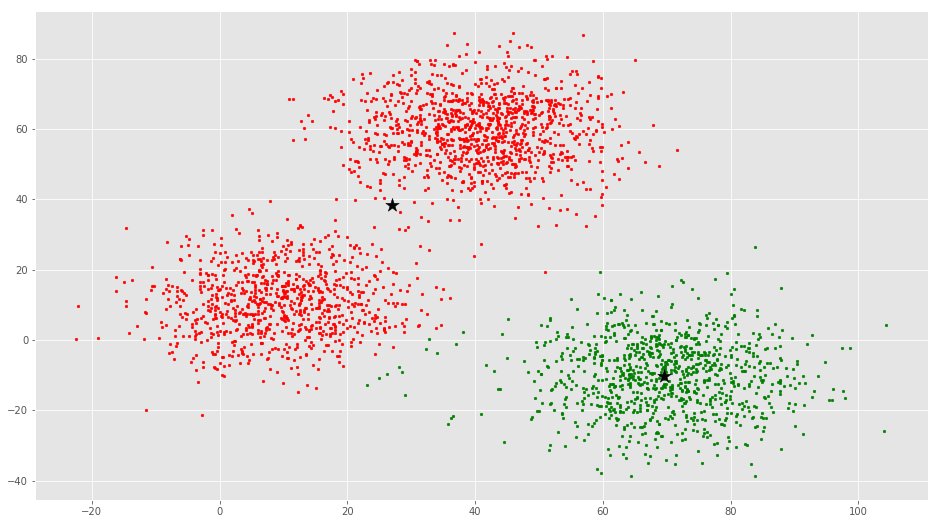

In [10]:
colors = ['r', 'g', 'b']
labels=['setosa','versicolor','virginica']
recs = []
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

plt.grid(True)
plt.show()

# Initialisation de intra et inter distance

In [11]:
def initialisation_intra_inter_distance():
    old_intra_cluster_distance=0
    new_intra_cluster_distance = deepcopy(old_intra_cluster_distance)

    max1=0
    max2=0

    distances = np.zeros((n,n))
    for i in range(n):
        distances[:,i] = np.linalg.norm(X - X[i], axis=1)
    for i in range(n):
        for j in range(n):
            max1=distances[i][j]
            if max1>max2:
                max2=max1
        
    old_inter_cluster_distance=max2 # to store old centers
    new_inter_cluster_distance = deepcopy(old_inter_cluster_distance)
    return(old_inter_cluster_distance,new_inter_cluster_distance,old_intra_cluster_distance,new_intra_cluster_distance)

old_inter_cluster_distance=initialisation_intra_inter_distance()[0]
new_inter_cluster_distance=initialisation_intra_inter_distance()[1]
old_intra_cluster_distance=initialisation_intra_inter_distance()[2]
new_intra_cluster_distance=initialisation_intra_inter_distance()[3]
print(old_inter_cluster_distance)
print(new_inter_cluster_distance)
print(old_intra_cluster_distance)
print(new_intra_cluster_distance)

134.59572858834895
134.59572858834895
0
0


# Calcule de inter distance

In [14]:
import math
def valeur(k):
        cpt=0
        for i in range (k):
            cpt=cpt+i
        return(cpt)
def calcul_inter_distance():
    coef=np.zeros(valeur(k))
    cpt=0
    for i in range (k-1):
        for j in range(i+1,k):
            coef[cpt]=np.linalg.norm(C[i]-C[j])
            cpt+=1
    print(coef)
    inter_distance=min(coef)
    return(inter_distance)
new_inter_cluster_distance=calcul_inter_distance()
print(new_inter_cluster_distance)

[64.51952964]
64.51952963669117


# Calcule de intra distance

In [15]:
def calcul_intra_distance():
    valeur=np.zeros(n)
    indice=0
    for i in range (n):
        indice=clusters[i]
        valeur[i]=np.linalg.norm(X[i]-C[int(indice)])
    intra_class=np.mean(valeur, axis=0)
    return(intra_class)
new_intra_cluster_distance=calcul_intra_distance()
print(new_intra_cluster_distance)

24.926644285482002


# Application kmeans modifié

In [16]:
erreur=new_intra_cluster_distance > old_intra_cluster_distance and new_inter_cluster_distance < old_inter_cluster_distance
while erreur==True :
    k=k+1
    C=generation_centre_clusters(k)
    C,clusters=kmeans()
    old_intra_cluster_distance = deepcopy(new_intra_cluster_distance)
    old_inter_cluster_distance = deepcopy(new_inter_cluster_distance)
    if fixed_no_of_clusters == False: 
        new_inter_cluster_distance=calcul_inter_distance()
        new_intra_cluster_distance=calcul_intra_distance()    
    erreur=new_intra_cluster_distance > old_intra_cluster_distance and new_inter_cluster_distance < old_inter_cluster_distance
print(k)
print(C)

[58.11810068 63.92661838 75.71005186]
3
[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]


# Tracer les centres finaux et leurs classes

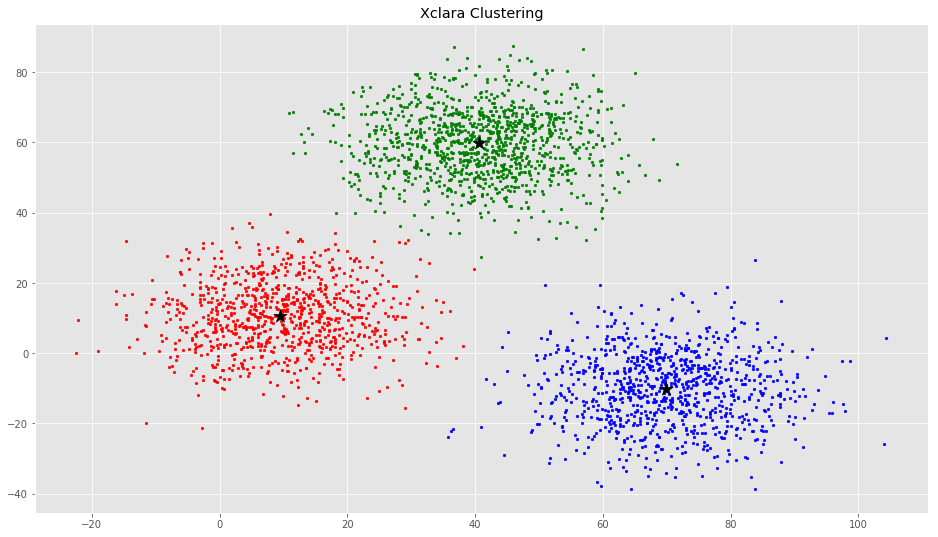

In [17]:
colors = ['r', 'g', 'b']
labels=['setosa','versicolor','virginica']
recs = []
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')
plt.grid(True)
plt.title('Xclara Clustering')

plt.show()